# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Eric Hahn

Datum: 18.11.2023

Gruppe: 88

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

**Forschungsfrage 1:** Wie lässt sich die Wärmekapazität eines Wasserbehälter mithilfe von Metadaten auswerten?

**Forschungsfrage 2:** Ist die Auswertung realistisch?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Zwei mit Wasser unterschiedlicher Temperatur gefüllte Messbecher werden nebeneinander plaziert. In jeden Messbecher wird je ein Temperatursensor eingetaucht. 

Nach gewisser Zeit werden die beiden Wassermengen zusammengeführt, ebenso die Sensoren.

<img src="figures/eigener_versuchsaufbau.jpg" width="800">

## Versuchsauswertung

In [68]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [69]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
 
import h5py as h5                                          #h5py importieren
path_h5 = "/home/pi/calorimetry_home/H5/H5.h5"       #Pfad zum h5-File definieren

# DONE #

In [70]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

with h5.File("H5/H5.h5") as f:                       #Einlesen des h5-Files
    raw = f["RawData"]                               #Einlesen der RawData Datei
    sensor_1 = raw["1ee809ee-496a-6c68-b1ac-24925961eec5"]     #öffnen der beiden Sensoren
    sensor_2 = raw["1ee809f4-469b-61f3-b8b0-e35af6ea279e"]
    y_1 = sensor_1["temperature"]                              #speichern der Sensordaten (x = Zeit, y= Temperatur)
    x_1 = sensor_1["time"]
    y_2 = sensor_2["temperature"]                              
    x_2 = sensor_2["time"]
    y_1neu = np.array(y_1)                                     #umwandeln in lesbare Dateien
    x_1neu = np.array(x_1)
    y_2neu = np.array(y_2)
    x_2neu = np.array(x_2)

# DONE 

#### (ii) Daten ploten

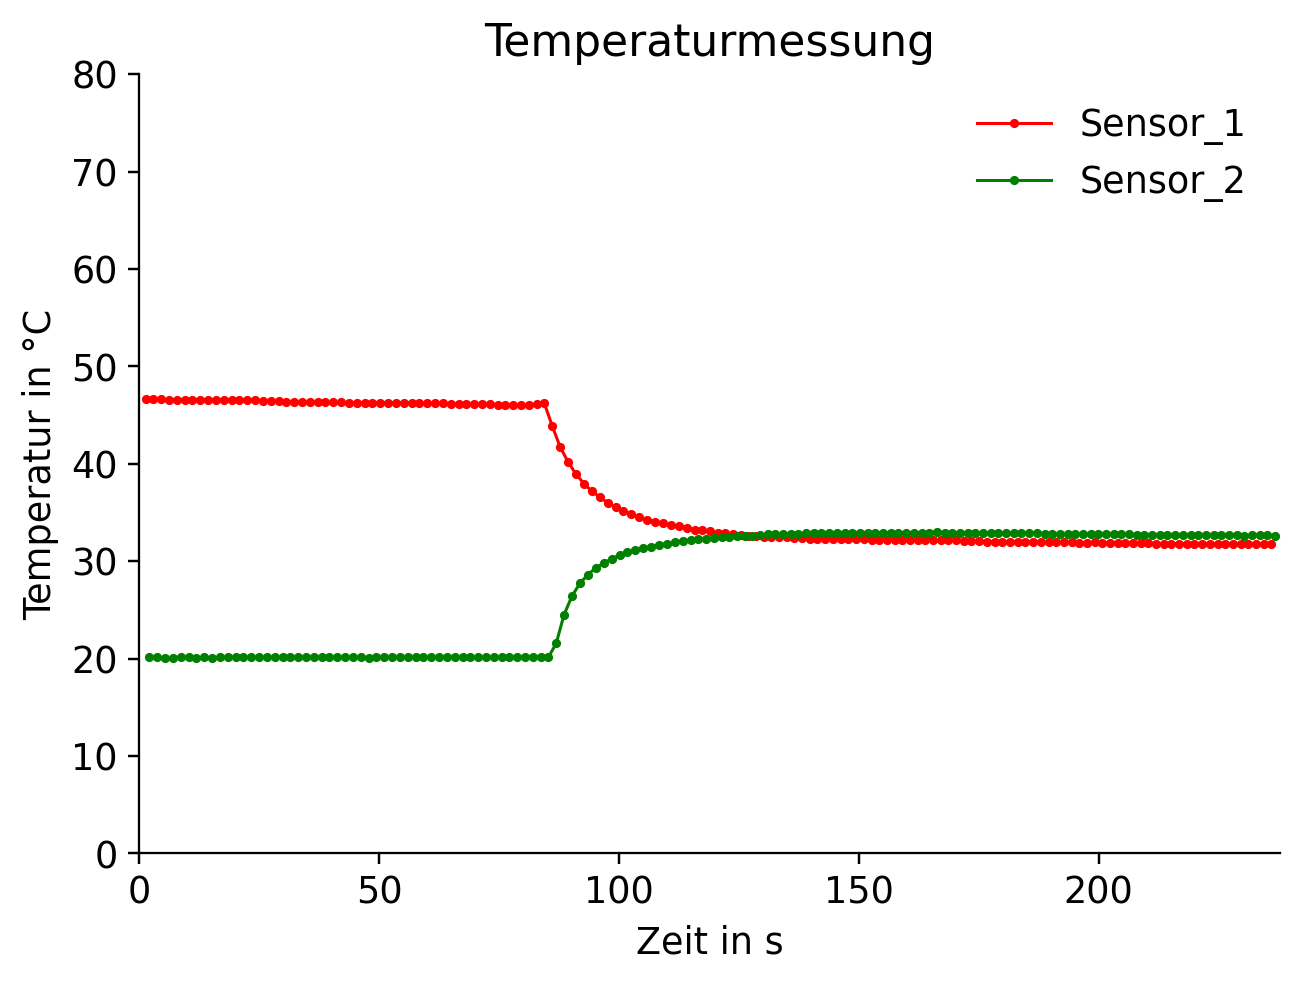

In [71]:
# TODO: Use the temperature and time data for plotting

plt.plot(x_1neu, y_1neu, label = "Sensor_1", color = "r", linewidth = 1, marker = "o", markersize = 2) #plotten
plt.plot(x_2neu, y_2neu, label = "Sensor_2", color = "g", linewidth = 1, marker = "o", markersize = 2)

plt.ylabel("Temperatur in °C")                                            #verschönern des Graphen
plt.xlabel("Zeit in s")
plt.title("Temperaturmessung")
plt.legend(loc = "upper right")

maxtime = 0                         #Schleife zur Ermittlung der Maximalen Zeit für die Graphgildung
if max(x_1neu) > max(x_2neu):
    maxtime = x_1neu
elif max(x_1neu) == max(x_2neu):
    maxtime = x_1neu
else:
    maxtime = x_2neu
    
plt.xlim(0, max(maxtime)+1)
plt.ylim(0, 80)
plt.show()

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [76]:
# Heat capacity of Water
water_heat_capa = int(4.18)

# TODO: Read mass from the metadata of the experiment.

Metadata = m_json.get_metadata_from_setup("datasheets/setup_heat_capacity.json")     #Metadaten einlesen

UUID = Metadata["probecapacity"]["values"][0]                      #UUID herausfiltern

m_1 = m_json.get_json_entry("datasheets", UUID, ["probe_1", "mass"])       #Masse des warmen Behälters
print(m_1)

m_2 = m_json.get_json_entry("datasheets", UUID, ["probe_2", "mass"])       #Masse des kalten Behälters
print(m_2)

m_1neu = int(float(m_1))    #Massen als Integer ausgeben lassen
m_2neu = int(float(m_2))

m_ges = m_1neu + m_2neu     #Probe, ob Werte korrekt ausgegeben werden
print(m_ges)

# DONE #

400
400
800


#### (iV) Anfangs- und Endwert der Temperatur

In [80]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

start_temp_1 = y_1neu[0]     #Start- und Endtemperaturen jerweils bestimmen
end_temp_1 = y_1neu[-1]

st1 = int(start_temp_1)      #Start- und Endtemperaturen als Integer ausgeben lassen
et1 = int(end_temp_1)

start_temp_2 = y_2neu[0]
end_temp_2 = y_2neu[-1]

st2 = int(start_temp_2)      
et2 = int(end_temp_2)

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [78]:
# TODO: Calculate heat capacity of the calorimeter

m_add = m_2neu       #Variablen der o.g. Formel definieren 
m_cup = m_1neu
T_2 = st2
T_1 = st1
T_M = et1

capacity = ((m_add*water_heat_capa*(T_2-T_M))/(T_M-T_1)) - m_cup*water_heat_capa 


# DONE #

#### (Vi) Ergebnis

In [79]:
# TODO: Print result

print(capacity)

# DONE #

-426.66666666666674


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Wärmekapazität konnte durch die Auswertung der Sensordaten bestimmt werden. Jedoch ist ein negativer Wert kein realistischer Wert. Es würde bedeuten, dass um das Wasser des Behälters um 1K zu erhöhen etwa, 427J **aus dem System austreten** müssten. Dies ist ein unlogisches Ergebnis.

Somit lässt sich die Forschungsfrage, ob das Ergebnis realistisch sei, mit nein beantworten.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Die Programmierung war leider viel **(!!!)** zu aufwändig für ein 2CP-Fach. 

Leider total unangemessen, wodurch der Lerneffekt ziemlich gering ist. 

Auch die Aufgabenstellung ist uneindeutig formuliert, teils irreführend und vorallem viel zu unausreichend erläutert. Bis man herausgefunden hat, was erwartet wird, ist viel Zeit verstrichen. 

Positiv ist, dass der Graph wenigstens vernünftig aussieht.
